In [91]:
# @title Importing Libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [36]:
# @title Load dataset
# Define the dataset file path (replace with your actual file path)
df = pd.read_csv("/content/spam.csv", encoding="latin-1")

In [37]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [39]:
df['v1'].value_counts()

v1
ham     4825
spam     747
Name: count, dtype: int64

In [40]:
df['v2'].value_counts()

v2
Sorry, I'll call later                                                                                                                                                 30
I cant pick the phone right now. Pls send a message                                                                                                                    12
Ok...                                                                                                                                                                  10
7 wonders in My WORLD 7th You 6th Ur style 5th Ur smile 4th Ur Personality 3rd Ur Nature 2nd Ur SMS and 1st \Ur Lovely Friendship\"... good morning dear"               4
Say this slowly.? GOD,I LOVE YOU &amp; I NEED YOU,CLEAN MY HEART WITH YOUR BLOOD.Send this to Ten special people &amp; u c miracle tomorrow, do it,pls,pls do it...     4
                                                                                                                                                   

In [42]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [58]:
# Extract relevant columns
data = df[['v1', 'v2']]
data.columns = ['label', 'message']

In [59]:
# @title Data Preprocessing
#Data Preprocessing
processed_data = []
for message in data['message']:
    # Lowercase and remove punctuation
    processed_message = message.lower()
    processed_data.append(processed_message)

In [72]:
# Feature Extraction: TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['v2'])
y = df['v1']

In [73]:
# @title Split dataset
# Split the dataset into features (X) and labels (y)
X = processed_data
y = data['label'].map({'spam': 1, 'ham': 0})

In [74]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
# @title Model Training: Logistic Regression with TF-IDF features
# Model Training: Logistic Regression with TF-IDF features
logreg_tfidf = LogisticRegression()
logreg_tfidf.fit(X_train_tfidf, y_train)

LogisticRegression()

In [75]:
# Predictions
y_pred_tfidf = logreg_tfidf.predict(X_test_tfidf)

In [76]:
# @title Model Evaluation
# Model Evaluation
print("TF-IDF + Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_tfidf))
print("Classification Report:")
print(classification_report(y_test, y_pred_tfidf))

TF-IDF + Logistic Regression Performance:
Accuracy: 0.9659192825112107
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       0.99      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



In [85]:
# @title Confusion Matrix
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_tfidf)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[965   0]
 [ 42 108]]


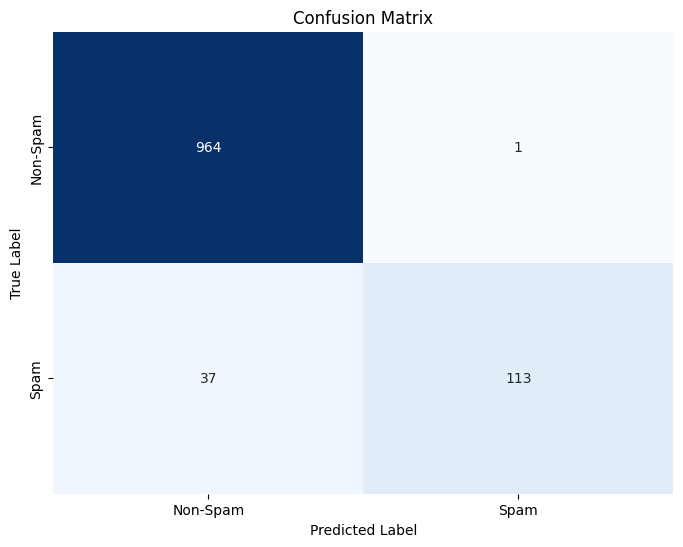

In [90]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Non-Spam', 'Spam'], yticklabels=['Non-Spam', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

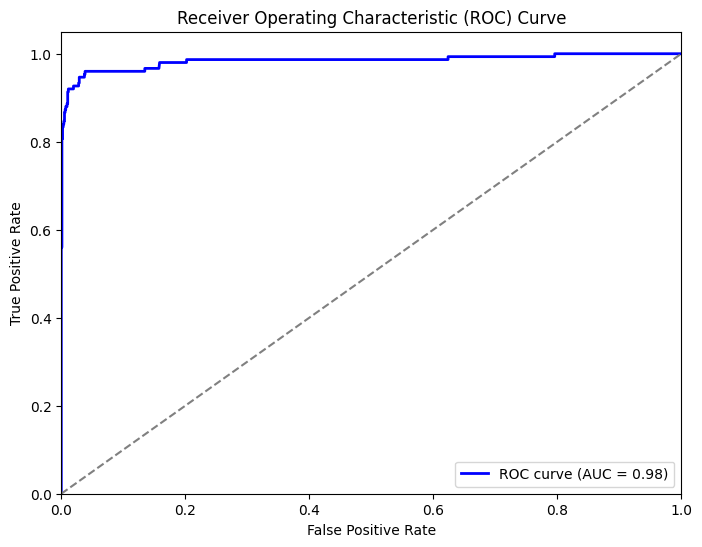

In [84]:
# @title ROC curve
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()